In [1]:
#Importing the Libraries
import matplotlib. pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import sklearn
import sklearn.linear_model as lm
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,recall_score,precision_score,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,average_precision_score,recall_score
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
all_data = pd.read_csv("KOTAKBANK.csv")
#all_data=all_data.drop(['Date','Trades','Deliverable Volume','%Deliverble','Symbol','Series'],axis=1)
df=all_data.drop(['Trades','Deliverable Volume','%Deliverble','Symbol','Series'],axis=1)
df.head()


,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
0,2000-01-03,212.35,220.0,229.35,220.00,229.35,229.35,229.13,7086,1.623640e+11
1,2000-01-04,229.35,247.7,247.70,225.25,247.70,246.95,244.12,73681,1.798729e+12
2,2000-01-05,246.95,229.0,240.00,227.20,228.00,228.40,233.75,105799,2.473093e+12
3,2000-01-06,228.40,235.1,239.00,217.00,224.95,225.90,226.84,40202,9.119546e+11
4,2000-01-07,225.90,213.0,219.00,207.85,207.85,208.85,209.94,24463,5.135747e+11


#Understanding df.info()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5256 entries, 0 to 5255
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        5256 non-null   object 
 1   Prev Close  5256 non-null   float64
 2   Open        5256 non-null   float64
 3   High        5256 non-null   float64
 4   Low         5256 non-null   float64
 5   Last        5256 non-null   float64
 6   Close       5256 non-null   float64
 7   VWAP        5256 non-null   float64
 8   Volume      5256 non-null   int64  
 9   Turnover    5256 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 410.8+ KB


1.Data has only float and integer values.

2.No variable column has null/missing values.


#Understanding df.describe()

In [4]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
count,5256.000000,5256.000000,5256.000000,5256.000000,5256.000000,5256.000000,5256.000000,5.256000e+03,5.256000e+03
mean,754.373592,755.258153,766.777654,742.552816,754.674448,754.714441,754.869159,1.385625e+06,1.593992e+14
std,498.112627,498.392492,503.380147,492.595888,498.314330,498.286162,497.988889,2.510341e+06,3.756992e+14
min,27.300000,26.950000,30.000000,26.000000,26.500000,27.300000,27.670000,1.050000e+02,4.608250e+08
25%,369.087500,370.000000,378.575000,359.012500,368.000000,369.287500,369.370000,2.283688e+05,6.889276e+12
50%,668.050000,668.925000,678.950000,656.150000,668.000000,668.175000,666.485000,8.070805e+05,5.513987e+13
75%,1046.800000,1047.175000,1059.962500,1030.600000,1048.375000,1047.725000,1047.502500,1.764727e+06,1.551961e+14
max,2210.950000,2200.000000,2253.000000,2176.600000,2210.650000,2210.950000,2210.750000,8.385990e+07,1.498222e+16


The describe() function in pandas is very handy in getting various summary statistics.This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.

1.The mean value is gretaer than median value of each column which is represented by 50%(50th percentile) in index column meaning Data has positive skewed distribution.

2.There is notably a large difference between 75th %tile and max values of most of the feature variables.
Thus observations 1 and 2 suggests that there are extreme values-Outliers in our data set.

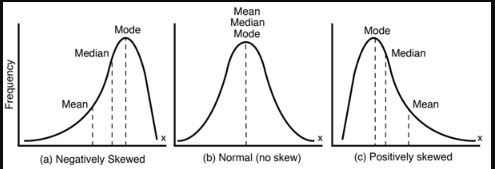

In [5]:
df.Close.unique()
df.Close.value_counts()

array([ 229.35,  246.95,  228.4 , ..., 1907.55, 1908.65, 1946.2 ])

43.00      15
40.00       5
145.65      5
765.55      4
390.10      4
           ..
252.40      1
244.65      1
249.70      1
253.30      1
1946.20     1
Name: Close, Length: 4666, dtype: int64

Target variable/Dependent variable is numerical in nature.

Python has a visualization library ,Seaborn which build on top of matplotlib. It provides very attractive statistical graphs in order to perform both Univariate and Multivariate analysis.

To use linear regression for modelling,its necessary to remove correlated variables to improve your model.One can find correlations using pandas “.corr()” function and can visualize the correlation matrix using a heatmap in seaborn.

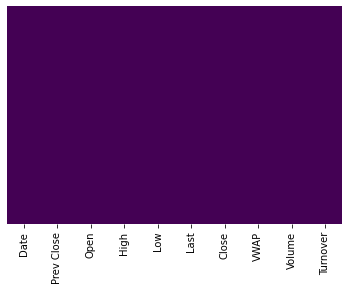

In [6]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

<Figure size 432x288 with 0 Axes>

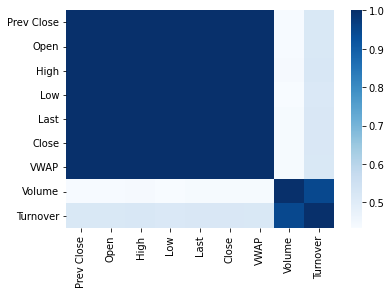

In [7]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),cmap='Blues',annot=False) 

Dark shades represents positive correlation while lighter shades represents negative correlation.If you set annot=True, you'll get values by which features are correlated to each other in grid-cells

<Figure size 720x360 with 0 Axes>

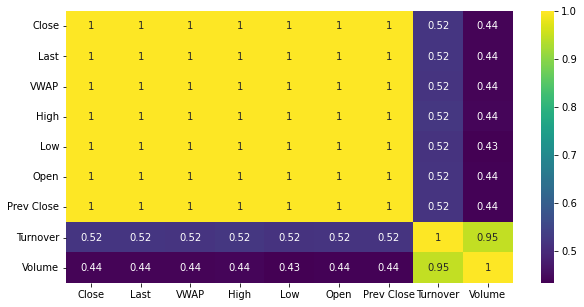

In [8]:
#Quality correlation matrix
k = 9 #number of variables for heatmap
cols = df.corr().nlargest(k, 'Close')['Close'].index
cm = df[cols].corr()
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [9]:
df=df.drop(['Date'],axis=1)
df.head()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
0,212.35,220.0,229.35,220.00,229.35,229.35,229.13,7086,1.623640e+11
1,229.35,247.7,247.70,225.25,247.70,246.95,244.12,73681,1.798729e+12
2,246.95,229.0,240.00,227.20,228.00,228.40,233.75,105799,2.473093e+12
3,228.40,235.1,239.00,217.00,224.95,225.90,226.84,40202,9.119546e+11
4,225.90,213.0,219.00,207.85,207.85,208.85,209.94,24463,5.135747e+11


#To check Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x7f62f4dbb670>,
 'caps': [<matplotlib.lines.Line2D at 0x7f62f4dbbd30>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7f62f4dbb2b0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f62f4dd0430>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f62f4dd0730>,
 'means': []}

([<matplotlib.axis.XTick at 0x7f62f4e1f700>,
 [Text(0, 0, 'Prev Close'),
  Text(0, 0, 'Open'),
  Text(0, 0, 'High'),
  Text(0, 0, 'Low'),
  Text(0, 0, 'Last'),
  Text(0, 0, 'VWAP'),
  Text(0, 0, 'Close')])

Text(0.5, 1.0, 'Customized box plot for HDFC DATASET')

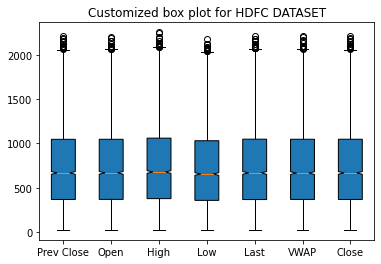

In [10]:
fig, ax = plt.subplots()
columns = [df["Prev Close"],df["Open"], df["High"], df["Low"],df["Last"], df["VWAP"], df["Close"]]
ax.boxplot(columns, notch=True, patch_artist=True)
plt.xticks([1, 2,3,4,5,6,7], ['Prev Close', 'Open','High', 'Low','Last', 'VWAP','Close'])
# Adding title
plt.title("Customized box plot for HDFC DATASET")
plt.show()


In [11]:
columns = [df["Prev Close"],df["Open"], df["High"], df["Low"],df["Last"], df["VWAP"], df["Close"]]
Prev_Close_list=df['Prev Close'].tolist()
Open_list=df['Open'].tolist()
High_list=df['High'].tolist()
Low_list=df['Low'].tolist()
Last_list=df['Last'].tolist()
VWAP_list=df['VWAP'].tolist()
Close_list=df['Close'].tolist()
total=len(Close_list);
TARGET0=[]
TARGET1=[]
TARGET2=[]
TARGET3=[]
TARGET4=[]
TARGET5=[]
TARGET6=[]
for j in range(0,len(columns)):
  median = np.median(columns[j])
  upper_quartile = np.percentile(columns[j], 75)
  lower_quartile = np.percentile(columns[j], 25)
  iqr = upper_quartile - lower_quartile
  upper_whisker = columns[j][columns[j]<=upper_quartile+1.5*iqr].max()
  lower_whisker = columns[j][columns[j]>=lower_quartile-1.5*iqr].min()
  for i in range(0,total):
   
      if(j==0):
        if(columns[j][i]>lower_quartile and columns[j][i]<upper_quartile):
          TARGET0.append('iqr')
        elif(columns[j][i]>upper_whisker):
          TARGET0.append('upper_whisker')
        elif(columns[j][i]<lower_whisker):
          TARGET0.append('lower_whisker')
        else:
          TARGET0.append('dontcare')
      elif(j==1):
        if(columns[j][i]>lower_quartile and columns[j][i]<upper_quartile):
          TARGET1.append('iqr')
        elif(columns[j][i]>upper_whisker):
          TARGET1.append('upper_whisker')
        elif(columns[j][i]<lower_whisker):
          TARGET1.append('lower_whisker')
        else:
          TARGET1.append('dontcare')
      elif(j==2):
        if(columns[j][i]>lower_quartile and columns[j][i]<upper_quartile):
          TARGET2.append('iqr')
        elif(columns[j][i]>upper_whisker):
          TARGET2.append('upper_whisker')
        elif(columns[j][i]<lower_whisker):
          TARGET2.append('lower_whisker')
        else:
          TARGET2.append('dontcare')
      elif(j==3):
        if(columns[j][i]>lower_quartile and columns[j][i]<upper_quartile):
          TARGET3.append('iqr')
        elif(columns[j][i]>upper_whisker):
          TARGET3.append('upper_whisker')
        elif(columns[j][i]<lower_whisker):
          TARGET3.append('lower_whisker')
        else:
          TARGET3.append('dontcare')
      elif(j==4):
        if(columns[j][i]>lower_quartile and columns[j][i]<upper_quartile):
          TARGET4.append('iqr')
        elif(columns[j][i]>upper_whisker):
          TARGET4.append('upper_whisker')
        elif(columns[j][i]<lower_whisker):
          TARGET4.append('lower_whisker')
        else:
          TARGET4.append('dontcare')
      elif(j==5):
        if(columns[j][i]>lower_quartile and columns[j][i]<upper_quartile):
          TARGET5.append('iqr')
        elif(columns[j][i]>upper_whisker):
          TARGET5.append('upper_whisker')
        elif(columns[j][i]<lower_whisker):
          TARGET5.append('lower_whisker')
        else:
          TARGET5.append('dontcare')
      elif(j==6):
        if(columns[j][i]>lower_quartile and columns[j][i]<upper_quartile):
          TARGET6.append('iqr')
        elif(columns[j][i]>upper_whisker):
          TARGET6.append('upper_whisker')
        elif(columns[j][i]<lower_whisker):
          TARGET6.append('lower_whisker')
        else:
          TARGET6.append('dontcare')

In [12]:
df0=pd.DataFrame(TARGET0)
df1=pd.DataFrame(TARGET1)
df2=pd.DataFrame(TARGET2)
df3=pd.DataFrame(TARGET3)
df4=pd.DataFrame(TARGET4)
df5=pd.DataFrame(TARGET5)
df6=pd.DataFrame(TARGET6)
df['Prev_Close_list']=df0
df['Open_list']=df1
df['High_list']=df2
df['Low_list']=df3
df['Last_list']=df4
df['VWAP_list']=df5
df['Close_list']=df6
df.head(10)

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Prev_Close_list,Open_list,High_list,Low_list,Last_list,VWAP_list,Close_list
0,212.35,220.0,229.35,220.00,229.35,229.35,229.13,7086,1.623640e+11,dontcare,dontcare,dontcare,dontcare,dontcare,dontcare,dontcare
1,229.35,247.7,247.70,225.25,247.70,246.95,244.12,73681,1.798729e+12,dontcare,dontcare,dontcare,dontcare,dontcare,dontcare,dontcare
2,246.95,229.0,240.00,227.20,228.00,228.40,233.75,105799,2.473093e+12,dontcare,dontcare,dontcare,dontcare,dontcare,dontcare,dontcare
3,228.40,235.1,239.00,217.00,224.95,225.90,226.84,40202,9.119546e+11,dontcare,dontcare,dontcare,dontcare,dontcare,dontcare,dontcare
4,225.90,213.0,219.00,207.85,207.85,208.85,209.94,24463,5.135747e+11,dontcare,dontcare,dontcare,dontcare,dontcare,dontcare,dontcare
5,208.85,215.0,219.00,192.15,192.15,192.15,196.47,12408,2.437804e+11,dontcare,dontcare,dontcare,dontcare,dontcare,dontcare,dontcare
6,192.15,180.2,180.20,176.80,176.80,176.80,176.98,15253,2.699472e+11,dontcare,dontcare,dontcare,dontcare,dontcare,dontcare,dontcare
7,176.80,165.0,169.45,162.70,162.70,162.70,163.34,20558,3.357920e+11,dontcare,dontcare,dontcare,dontcare,dontcare,dontcare,dontcare
8,162.70,149.7,175.70,149.70,163.35,167.35,163.83,103323,1.692773e+12,dontcare,dontcare,dontcare,dontcare,dontcare,dontcare,dontcare
9,167.35,169.0,177.00,156.15,160.50,159.85,161.69,31522,5.096878e+11,dontcare,dontcare,dontcare,dontcare,dontcare,dontcare,dontcare


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

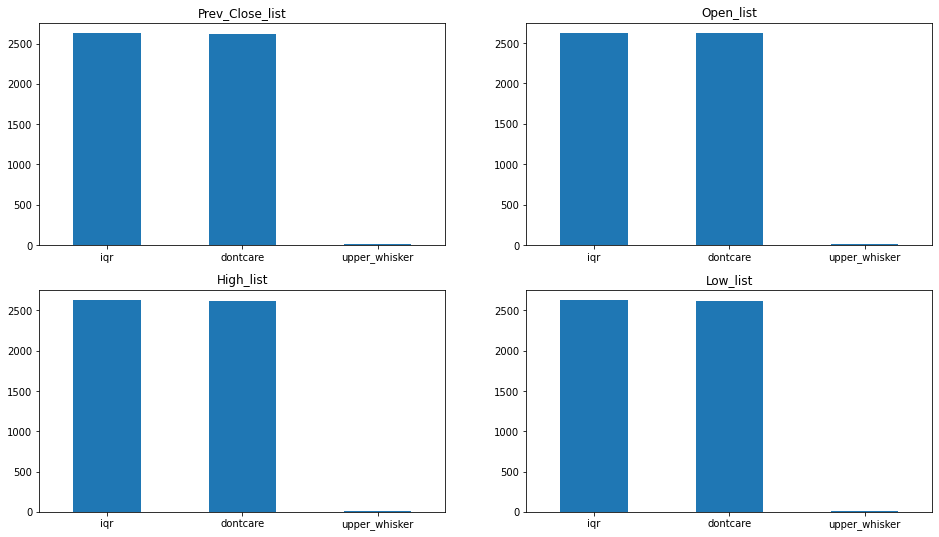

In [13]:
plt.subplot(221)
df['Prev_Close_list'].value_counts().plot(kind='bar', title='Prev_Close_list', figsize=(16,9))
plt.xticks(rotation=0)

plt.subplot(222)
df['Open_list'].value_counts().plot(kind='bar', title='Open_list', figsize=(16,9))
plt.xticks(rotation=0)

plt.subplot(223)
df['High_list'].value_counts().plot(kind='bar', title='High_list', figsize=(16,9))
plt.xticks(rotation=0)

plt.subplot(224)
df['Low_list'].value_counts().plot(kind='bar', title='Low_list', figsize=(16,9))
plt.xticks(rotation=0)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

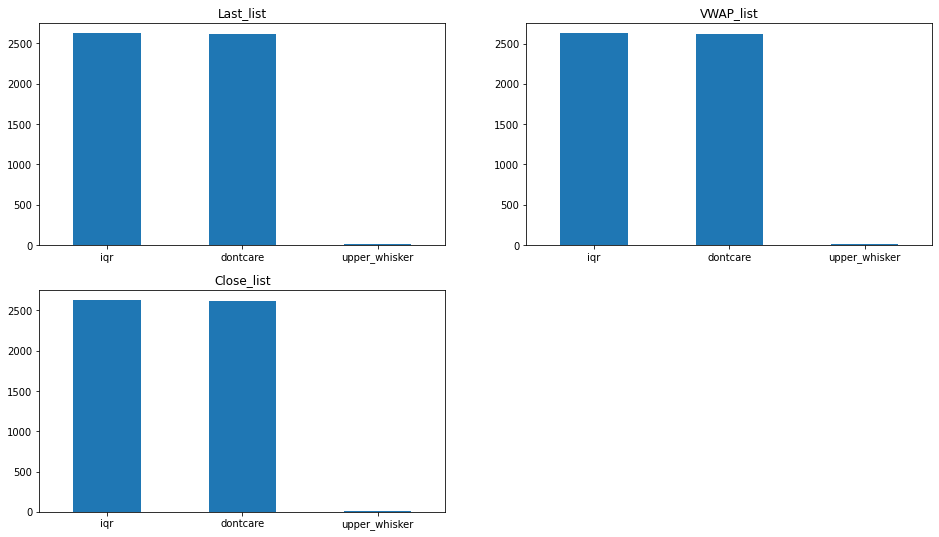

In [14]:
plt.subplot(221)
df['Last_list'].value_counts().plot(kind='bar', title='Last_list', figsize=(16,9))
plt.xticks(rotation=0)

plt.subplot(222)
df['VWAP_list'].value_counts().plot(kind='bar', title='VWAP_list', figsize=(16,9))
plt.xticks(rotation=0)

plt.subplot(223)
df['Close_list'].value_counts().plot(kind='bar', title='Close_list', figsize=(16,9))
plt.xticks(rotation=0)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


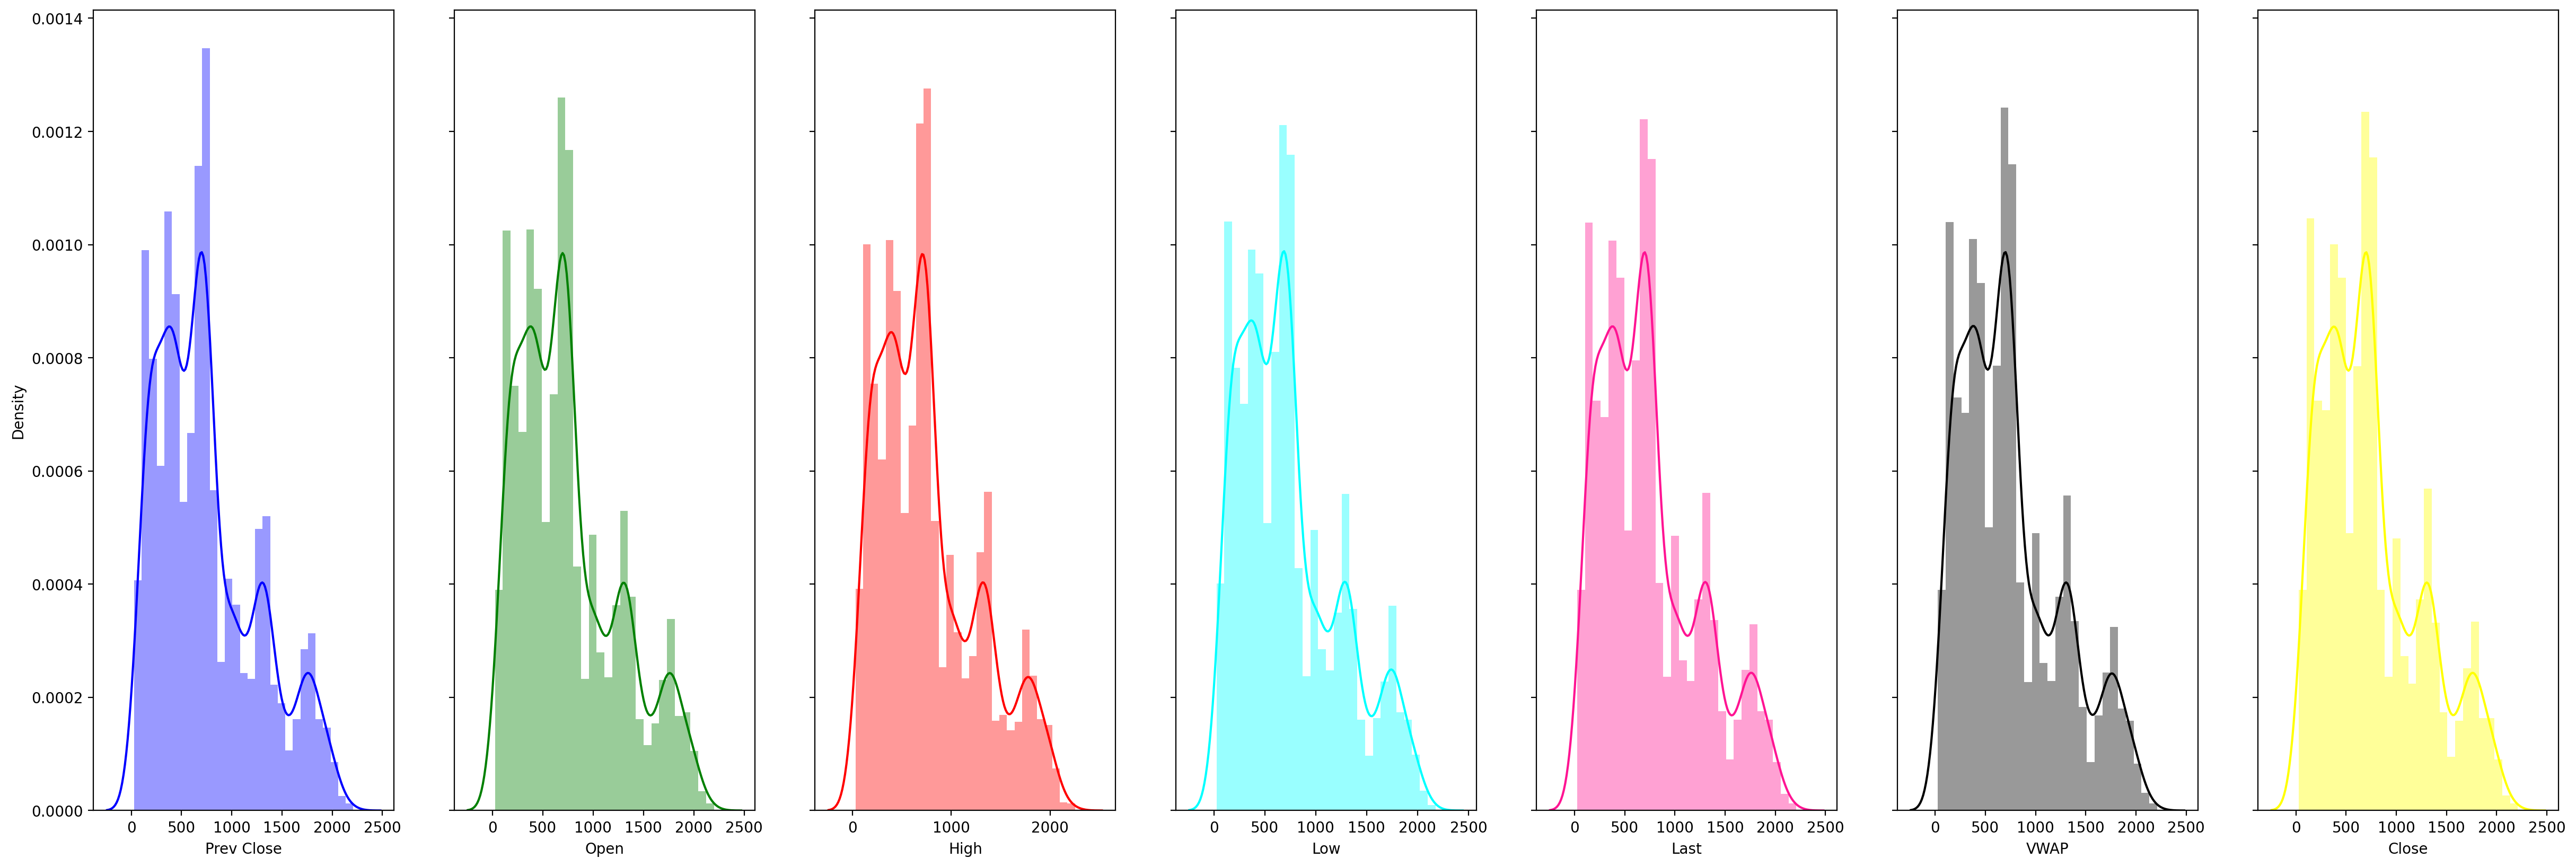

In [15]:
import matplotlib. pyplot as plt
columns = [df["Prev Close"],df["Open"], df["High"], df["Low"],df["Last"], df["VWAP"], df["Close"]]
fig, axes = plt.subplots(1, 7, figsize=(30,10), sharey=True, dpi=200)
sns.distplot(columns[0] , color="blue", ax=axes[0], axlabel='Prev Close')
sns.distplot(columns[1] , color="green", ax=axes[1], axlabel='Open')
sns.distplot(columns[2] , color="red", ax=axes[2], axlabel='High')
sns.distplot(columns[3] , color="cyan", ax=axes[3], axlabel='Low')
sns.distplot(columns[4] , color="deeppink", ax=axes[4], axlabel='Last')
sns.distplot(columns[5] , color="black", ax=axes[5], axlabel='VWAP')
sns.distplot(columns[6] , color="yellow", ax=axes[6], axlabel='Close')
#plt.xlim(50,75);


In [16]:
for k in columns:
  print(k.skew(),'\n')

0.7581761301390721 

0.7590441384021958 

0.7558152061207463 

0.7631709178175745 

0.7586775359920245 

0.758943618995313 

0.7580769054343266 



In [17]:

for k in columns:
   print(k.kurt(),'\n')

-0.259572183150659 

-0.2576581725600273 

-0.25938404440482365 

-0.2538535016915011 

-0.25958239848471765 

-0.2576394497758492 

-0.2606422002115836 



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


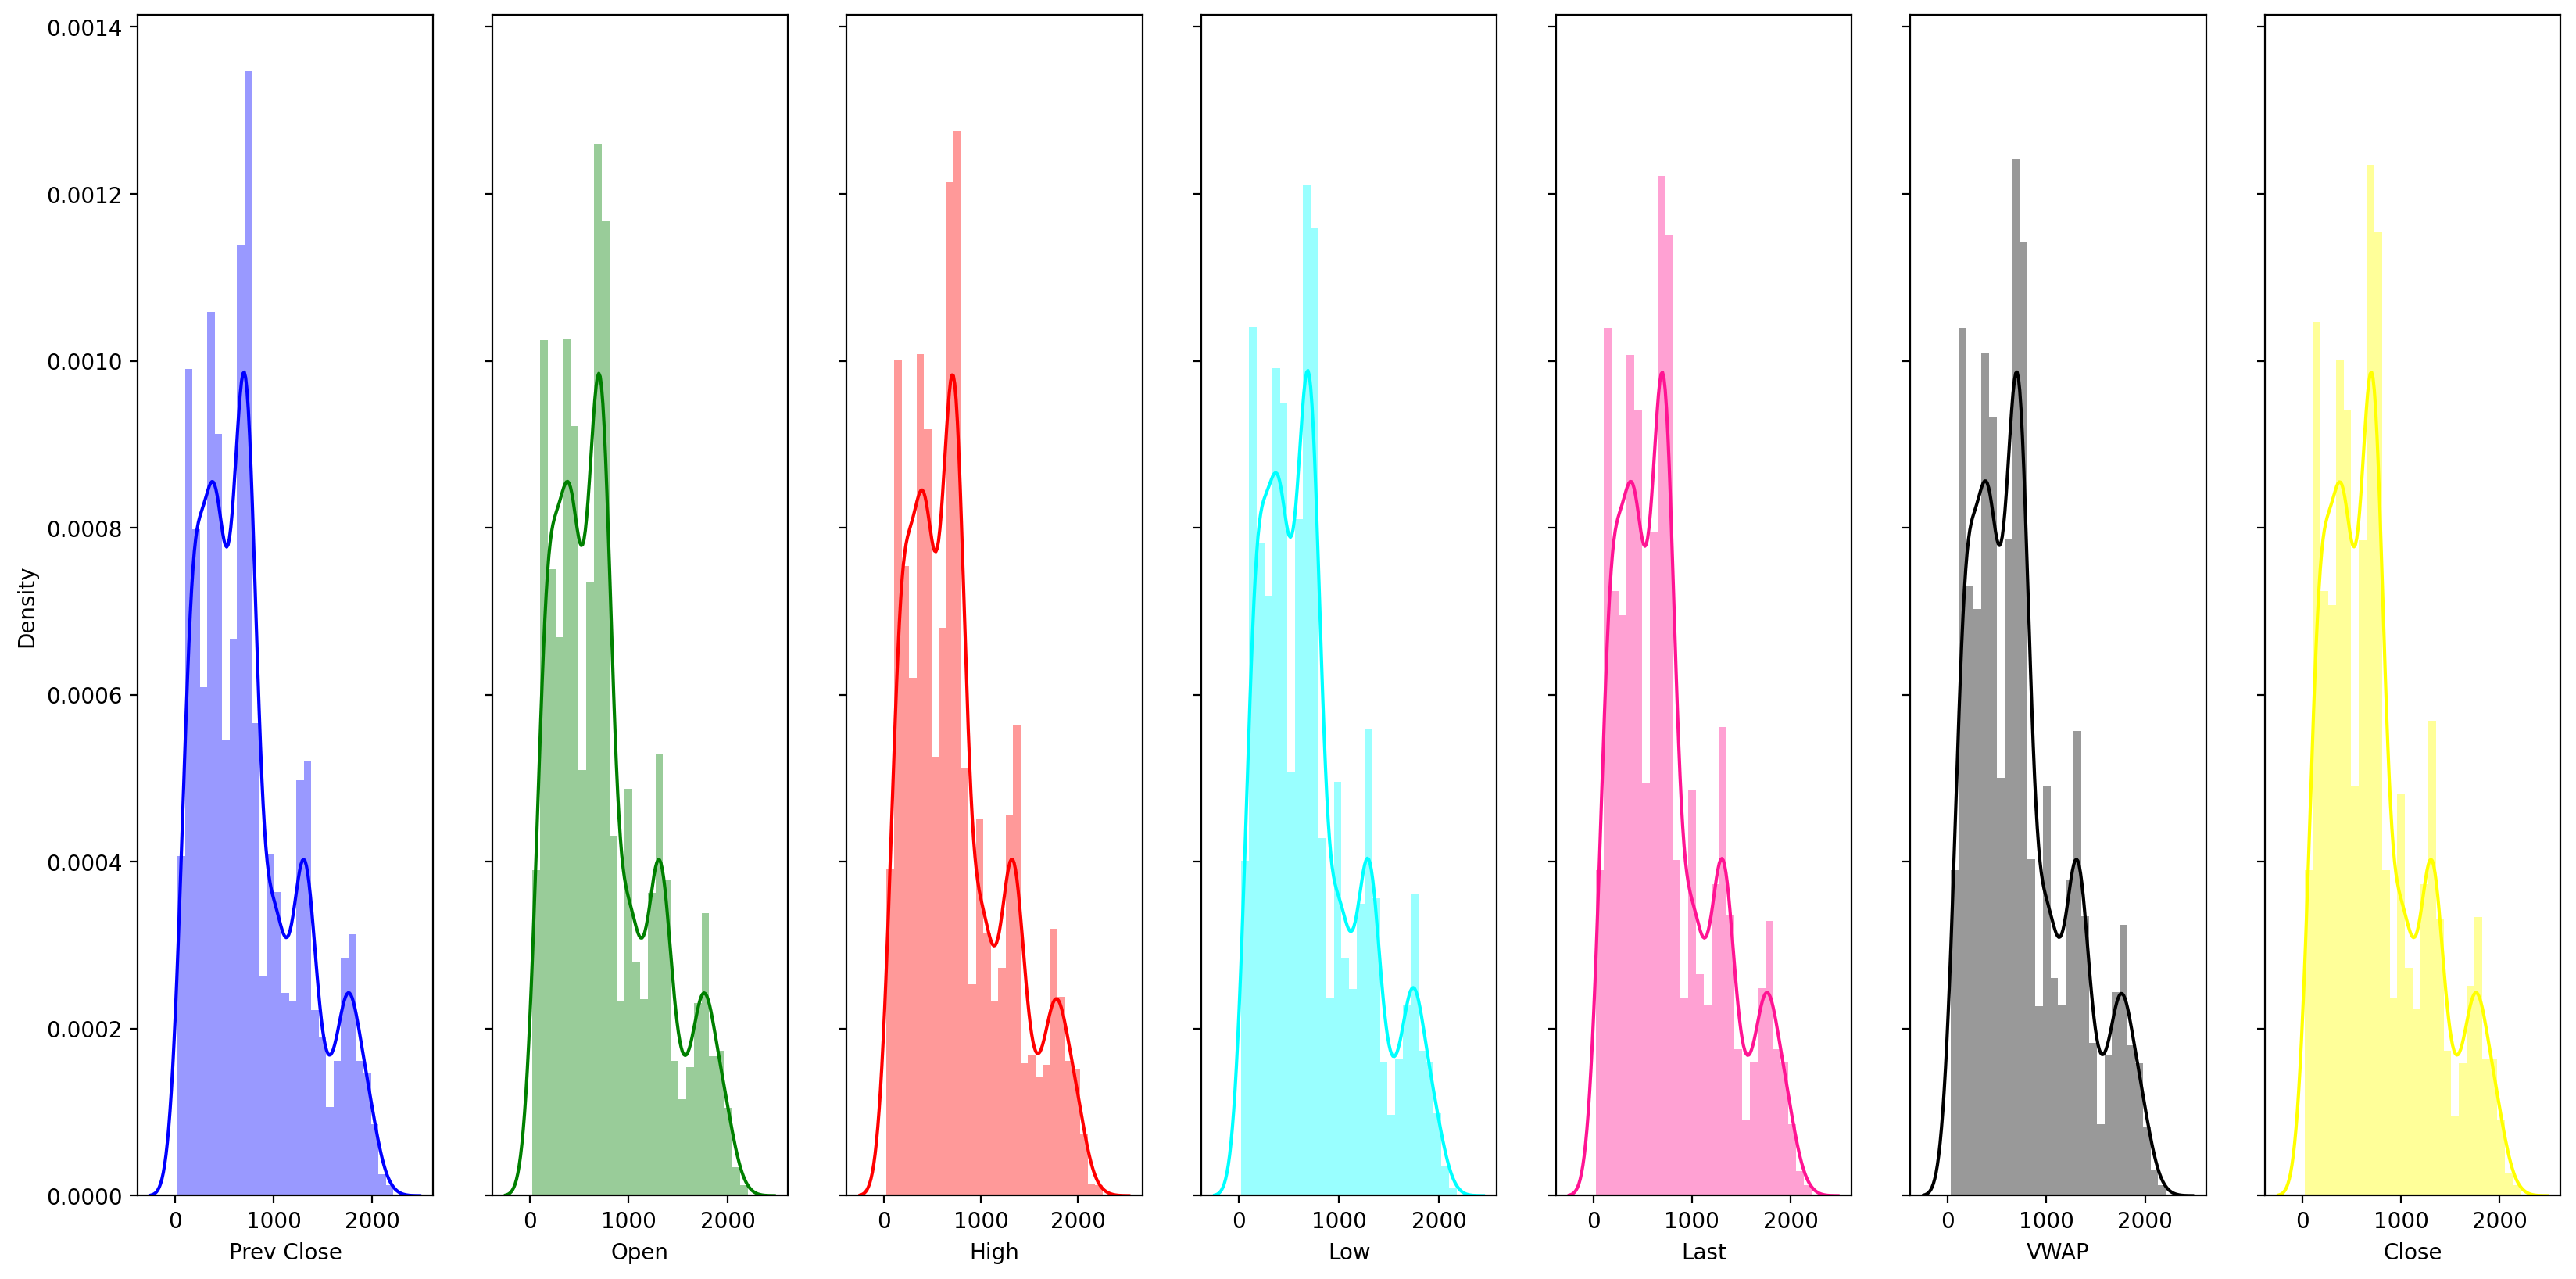

In [18]:
import matplotlib. pyplot as plt
columns = [df["Prev Close"],df["Open"], df["High"], df["Low"],df["Last"], df["VWAP"], df["Close"]]
fig, axes = plt.subplots(1, 7, figsize=(20,10), sharey=True, dpi=200)
sns.distplot(columns[0] , color="blue", ax=axes[0], axlabel='Prev Close')
sns.distplot(columns[1] , color="green", ax=axes[1], axlabel='Open')
sns.distplot(columns[2] , color="red", ax=axes[2], axlabel='High')
sns.distplot(columns[3] , color="cyan", ax=axes[3], axlabel='Low')
sns.distplot(columns[4] , color="deeppink", ax=axes[4], axlabel='Last')
sns.distplot(columns[5] , color="black", ax=axes[5], axlabel='VWAP')
sns.distplot(columns[6] , color="yellow", ax=axes[6], axlabel='Close')

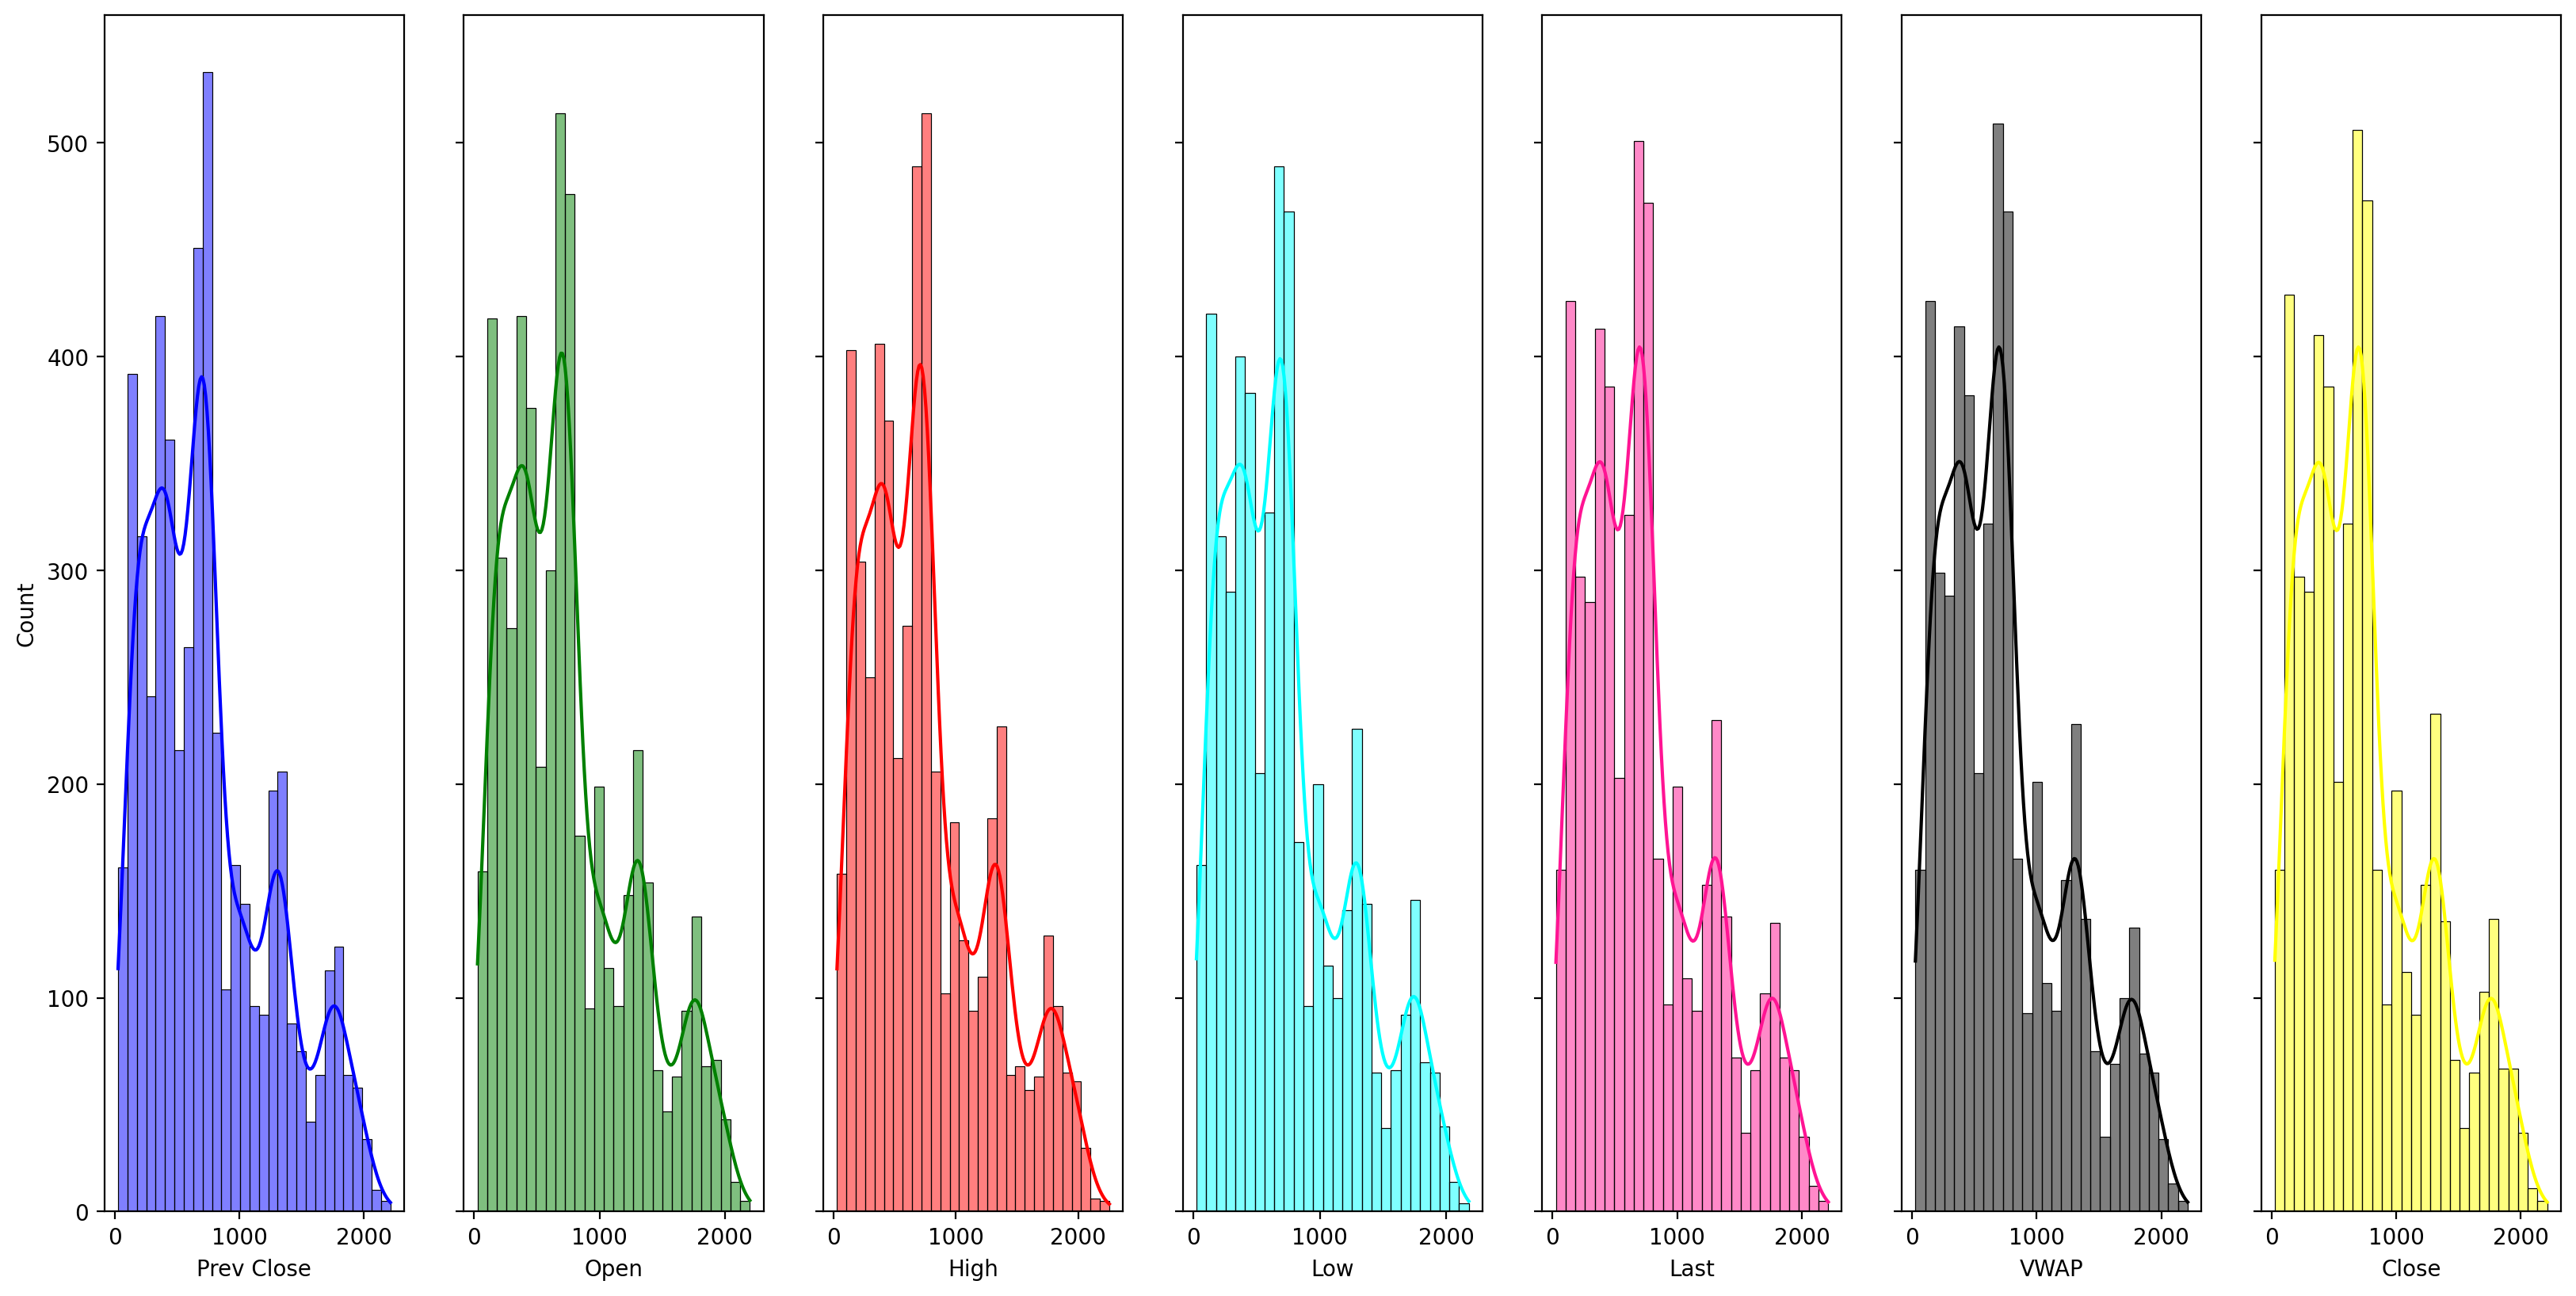

In [19]:
import matplotlib. pyplot as plt
columns = [df["Prev Close"],df["Open"], df["High"], df["Low"],df["Last"], df["VWAP"], df["Close"]]
fig, axes = plt.subplots(1, 7, figsize=(20,10), sharey=True, dpi=200)
sns.histplot(columns[0] , color="blue", ax=axes[0], kde = True)
sns.histplot(columns[1] , color="green", ax=axes[1], kde = True)
sns.histplot(columns[2] , color="red", ax=axes[2], kde = True)
sns.histplot(columns[3] , color="cyan", ax=axes[3], kde = True)
sns.histplot(columns[4] , color="deeppink", ax=axes[4], kde = True)
sns.histplot(columns[5] , color="black", ax=axes[5], kde = True)
sns.histplot(columns[6] , color="yellow", ax=axes[6], kde = True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


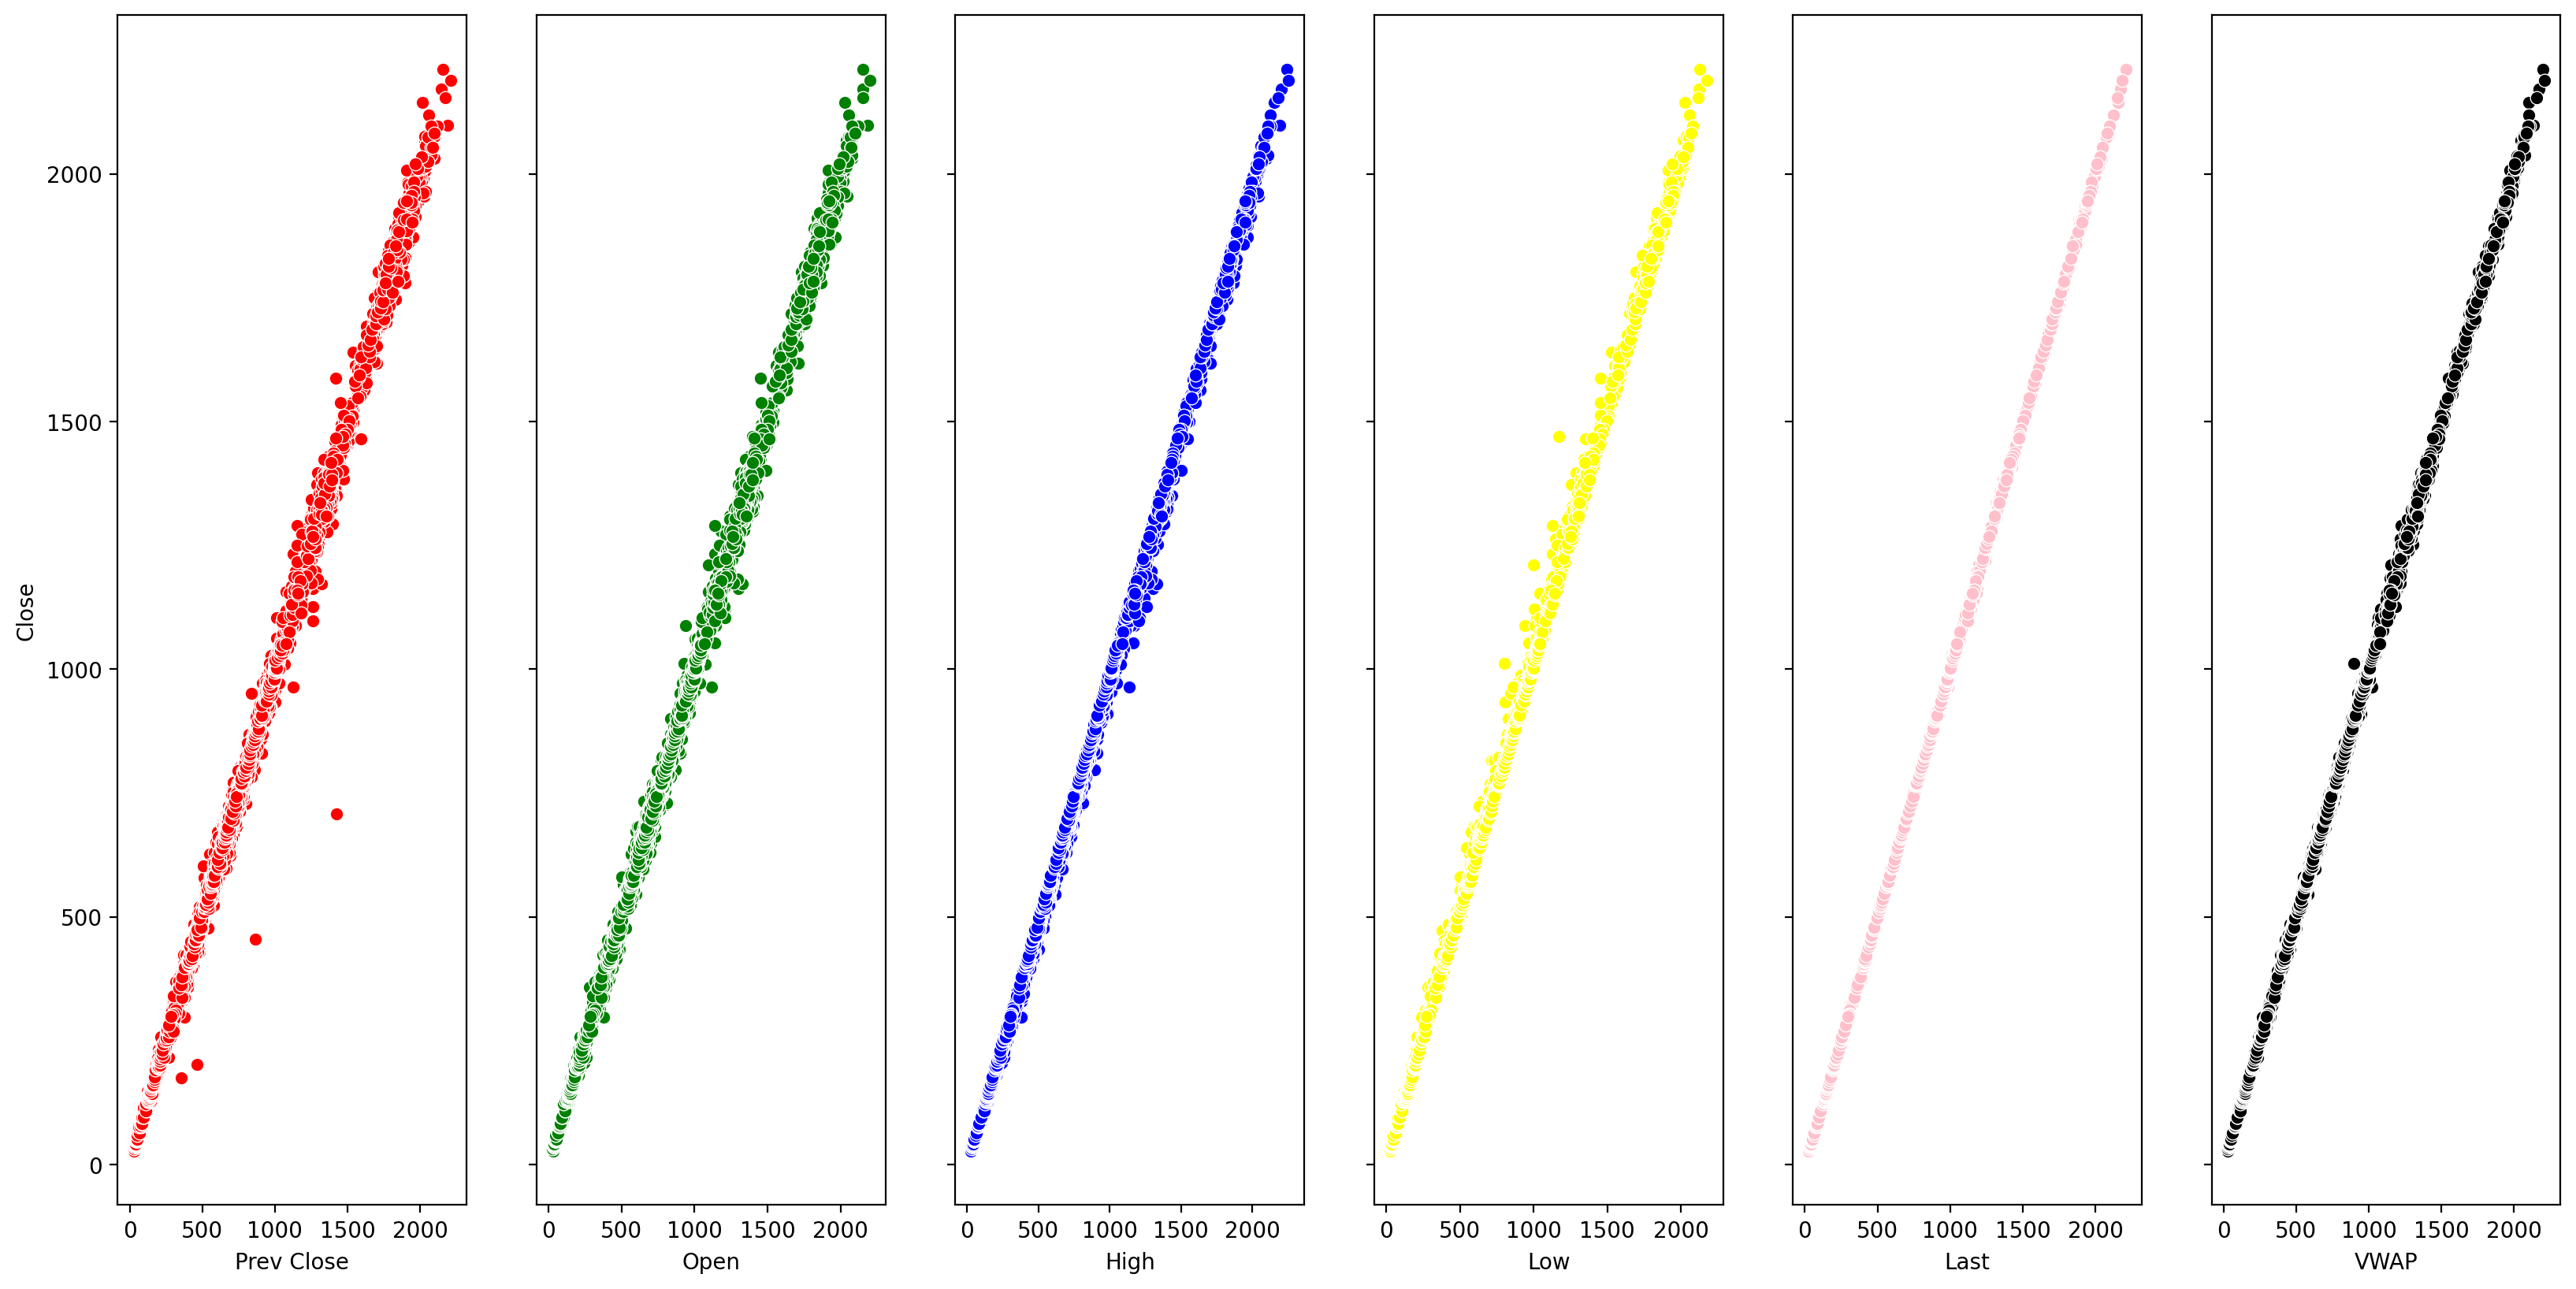

In [20]:
import matplotlib. pyplot as plt
columns = [df["Prev Close"],df["Open"], df["High"], df["Low"],df["Last"], df["VWAP"]]
colours=["red","green","blue","yellow","pink","black"]
fig, axes = plt.subplots(1,6, figsize=(20,10), sharey=True, dpi=200)
sns.scatterplot(columns[0], df["Close"],color = colours[0],ax=axes[0])
sns.scatterplot(columns[1], df["Close"],color = colours[1],ax=axes[1])
sns.scatterplot(columns[2], df["Close"],color = colours[2],ax=axes[2])
sns.scatterplot(columns[3], df["Close"],color = colours[3],ax=axes[3])
sns.scatterplot(columns[4], df["Close"],color = colours[4],ax=axes[4])
sns.scatterplot(columns[5], df["Close"],color = colours[5],ax=axes[5])

In [21]:
Close_list = df['Close'].tolist()
total=len(Close_list);

In [22]:
DIFF=[]
PERCDIFF=[]
TARGET=[]
counter=0
for i in range(0,total):
  #print("i is",i)
  diff=Close_list[i]-Close_list[i-1]
  DIFF.append(diff)
  percdiff=(diff*100)/Close_list[i]
  PERCDIFF.append(percdiff)
  if(percdiff>0.5):
    TARGET.append('pos')
  else:
    TARGET.append('notpos')

In [23]:
df1=pd.DataFrame(DIFF)
df2=pd.DataFrame(PERCDIFF)
df3=pd.DataFrame(TARGET)
df['DIFF']=df1
df['PERCDIFF']=df2
df['TARGET']=df3
df=df[1:]

In [24]:
#DUMMY CODING USING THE LOOP STRUCTURE
for col in df.columns:
  if df[col].dtype=='object':
    df[col]=pd.Categorical(df[col]).codes
df.head(5)

<ipython-input-24-a26379bbb8f1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=pd.Categorical(df[col]).codes


,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Prev_Close_list,Open_list,High_list,Low_list,Last_list,VWAP_list,Close_list,DIFF,PERCDIFF,TARGET
1,229.35,247.7,247.7,225.25,247.70,246.95,244.12,73681,1.798729e+12,0,0,0,0,0,0,0,17.60,7.126949,1
2,246.95,229.0,240.0,227.20,228.00,228.40,233.75,105799,2.473093e+12,0,0,0,0,0,0,0,-18.55,-8.121716,0
3,228.40,235.1,239.0,217.00,224.95,225.90,226.84,40202,9.119546e+11,0,0,0,0,0,0,0,-2.50,-1.106684,0
4,225.90,213.0,219.0,207.85,207.85,208.85,209.94,24463,5.135747e+11,0,0,0,0,0,0,0,-17.05,-8.163754,0
5,208.85,215.0,219.0,192.15,192.15,192.15,196.47,12408,2.437804e+11,0,0,0,0,0,0,0,-16.70,-8.691127,0


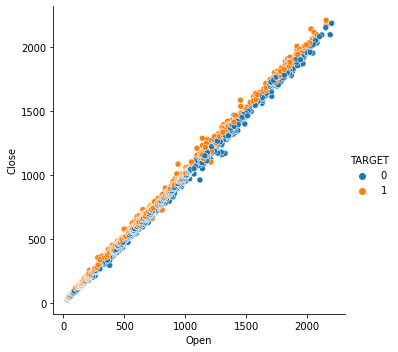

In [25]:
sns.relplot(x='Open', y='Close', hue='TARGET', data=df)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

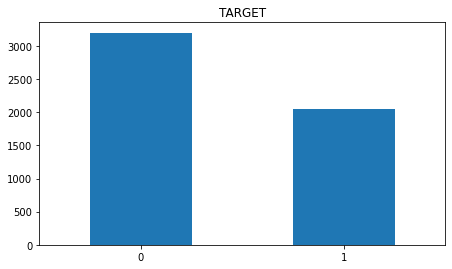

In [26]:
plt.subplot(221)

df['TARGET'].value_counts().plot(kind='bar', title='TARGET', figsize=(16,9))

plt.xticks(rotation=0)

In [ ]:
!jupyter nbconvert Data_UnderstandingKOTAK_Dataset.ipynb